# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

In [133]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score

%matplotlib inline

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

**Решение:**

Вычисление УМО:

$ \mathsf{E}(\xi | \mathcal{G}) = \dfrac{e^\lambda(\lambda (n - 1) + 1) - \lambda n - 1}{\lambda(e^\lambda - 1)}$

$\mathsf{E}(\xi^2 | \mathcal{G}) = \dfrac{e^\lambda (\lambda (n-1)(\lambda(n-1) + 2) + 2) - \lambda n(\lambda n + 2) - 2 }{\lambda^2 (e^\lambda - 1)}$

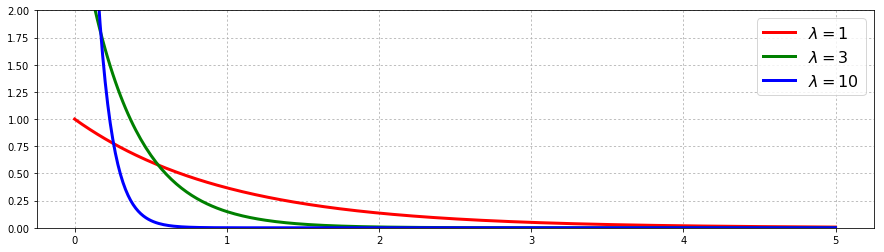

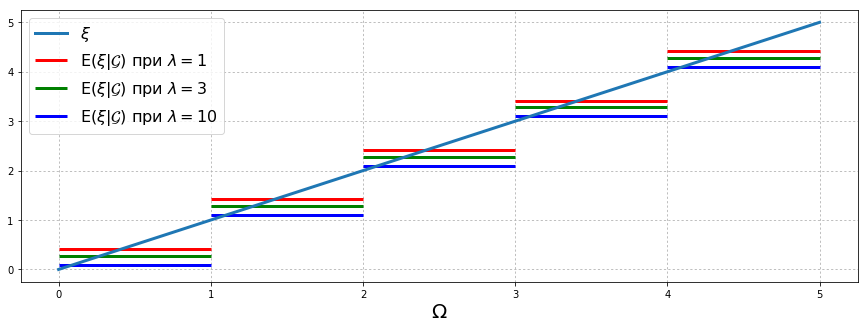

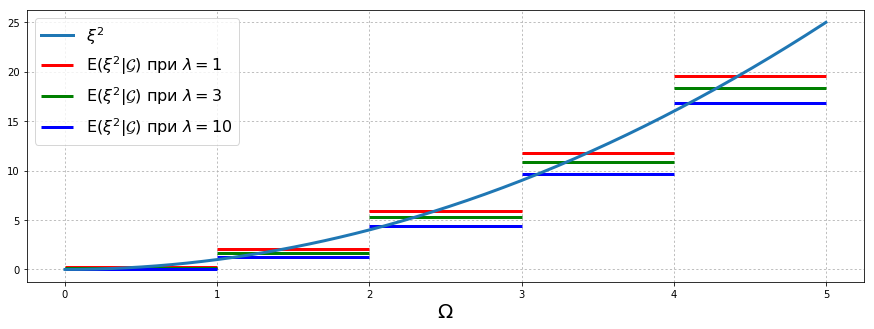

In [21]:
N = 5
colors = ['red', 'green', 'blue']
lamdas = [1, 3, 10]
x = np.linspace(0, N, 300)
# График 1
plt.figure(figsize=(15, 4))
for color, l in zip(colors, lamdas): 
    plt.plot(x, sps.expon.pdf(x, scale=1/l) , lw=3, color=color, label='$\\lambda={}$'.format(l))
plt.legend(fontsize=16)
plt.ylim((0, 2))
plt.grid(ls=':')


def CME_ksi(l, n):
    return (np.exp(l) * ((n - 1) * l + 1) - n * l - 1) / ((np.exp(l) - 1) * l)
    
# График 2
plt.figure(figsize=(15, 5))
plt.plot(x, x, lw=3, label='$\\xi$')
for color, l in zip(colors, lamdas):
    for i in range(N):  # события из сигма-алгебры
        plt.hlines(CME_ksi(l, i + 1), xmin = i, xmax = i + 1, color=color, lw=3,
                   label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = ' + str(l) 
                          + '$') if i == 1 else '')
    plt.xlabel('$\\Omega$', fontsize=20)
    plt.legend(fontsize=16)
    plt.grid(ls=':')


def CME_ksi_sq(l, n):
    numerator = np.exp(l) * ((n - 1) * l * (l * (n - 1) + 2) + 2) - n * l * (l * n + 2) - 2
    return numerator / (l ** 2 * (np.exp(l) - 1))

# График 3
plt.figure(figsize=(15, 5))
plt.plot(x, x ** 2, lw=3, label='$\\xi^2$')
for color, l in zip(colors, lamdas):
    for i in range(N):  # события из сигма-алгебры
        plt.hlines(CME_ksi_sq(l, i + 1), xmin = i, xmax = i + 1, color=color, lw=3,
                   label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = ' + str(l) 
                          + '$') if i == 1 else '')
    plt.xlabel('$\\Omega$', fontsize=20)
    plt.legend(fontsize=16)
    plt.grid(ls=':')

plt.show()

**Вывод:**
Из графиков можем заметить, что чем больше параметр $\lambda$, тем значение условного мат ожидания будет меньше (ближе к своей левой границе при условии разбиения $B_n$). Также мы наглядно убедились в том, что значение условного мат ожидания есть усреднение по элементу разбиения.

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

**Решение:**

$f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{p_{(\xi_1, \xi_2)} (x, y)}{p_{\xi_2}(y)}$

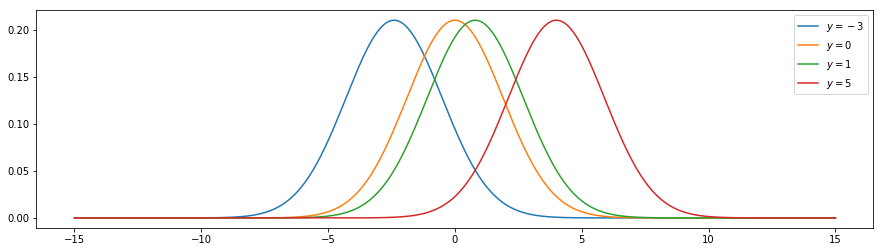

In [29]:
a = [0, 0]
cov = [ [10, 8], [8, 10] ]
ys = [-3, 0, 1, 5]
x = np.linspace(-15, 15, 500)

plt.figure(figsize=(15, 4))

for y in ys:
    xy = [[x_i, y] for x_i in x]
    pdf = sps.multivariate_normal.pdf(xy, mean=a, cov=cov)
    pdf /= sps.norm.pdf(y, loc=0, scale=np.sqrt(cov[1][1]))
    plt.plot(x, pdf, label='$y={}$'.format(y))

plt.legend()    
plt.show()

**Вывод:**
На построенных графиках мы можем наблюдать, что для различных $y$  $\mathsf{E}(X_1 | X_2 = y)$ имеет нормальное распределение с примерно одинаковой диспесрией и мат.ожиданием примерно равным заданному $y$.

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

**Решение:**

$\mathsf{E}( N_t | N_s) = \mathsf{E}( (N_s + N_t - N_s) | N_s) = N_s + \mathsf{E}( N_t - N_s) = N_s + \lambda(t-s)$

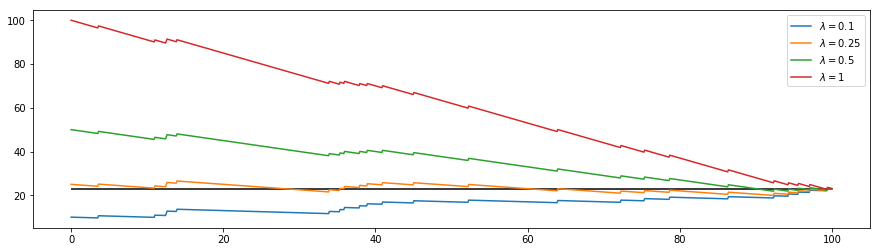

In [50]:
sample = sps.expon.rvs(size=300, scale=4)
time_of_break = sample.cumsum()
lambdas = [1/10, 1/4, 1/2, 1]
t = 100
time = np.linspace(0, t, 1000)
plt.figure(figsize=(15, 4))

for l in lambdas:
    num_of_breaks = np.empty(shape = time.shape)
    for i in range(len(time)):
        num_of_breaks[i] = np.count_nonzero(time[i] > time_of_break)
    res = num_of_breaks + l * (t - time)
    plt.plot(time, res, label='$\\lambda={}$'.format(l))
N_100 = np.count_nonzero(time[len(time) - 1] > time_of_break)
plt.hlines(N_100, xmax = 100, xmin = 0)    
plt.legend()
plt.show()

**Вывод:**
Из графика видно, что при истинном значении параметра значение условного мат. ожидания в любые моменты времени приблизительно равно реальному количеству поломанных серверов к конечному моменту времени $t$. То есть при удачно подобранном параметре можем предсказывать количество сломанных серверов далеко вперёд с хорошей точностью.

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [65]:
from sklearn.datasets import load_iris
data = load_iris()
sample = data['data']  # выборка
target = data['target']  # номера компонент смеси

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [66]:
sample1 = data['data'][0 : 50]
sample2 = data['data'][50 : 100]
sample3 = data['data'][100 : 150]
mean1 = sample1.mean(axis = 0)
mean2 = sample2.mean(axis = 0)
mean3 = sample3.mean(axis = 0)
cov1 = np.cov(sample1.T)
cov2 = np.cov(sample2.T)
cov3 = np.cov(sample3.T)
print ('mean1:\n', mean1, '\n\ncovariation_matrix_1:\n', cov1)
print ('\n\nmean2:\n', mean3, '\n\ncovariation_matrix_2:\n', cov2)
print ('\n\nmean3:\n', mean2, '\n\ncovariation_matrix_3:\n', cov3)

mean1:
 [ 5.006  3.418  1.464  0.244] 

covariation_matrix_1:
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]


mean2:
 [ 6.588  2.974  5.552  2.026] 

covariation_matrix_2:
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]


mean3:
 [ 5.936  2.77   4.26   1.326] 

covariation_matrix_3:
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

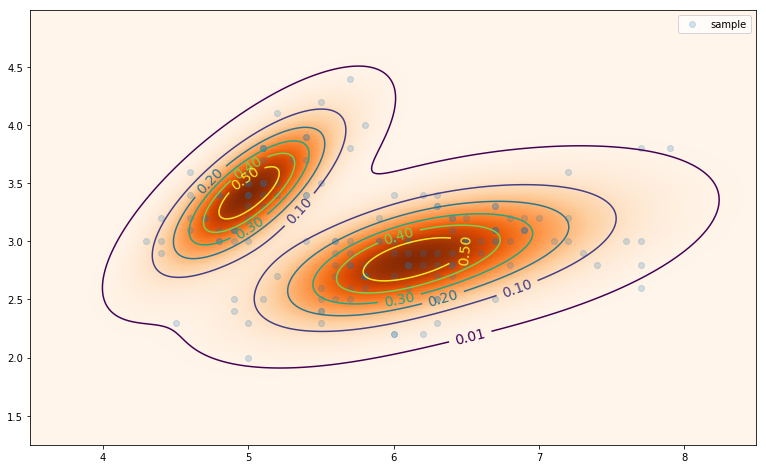

In [87]:
grid = np.mgrid[3.5:8.5:0.01, 1.25:5:0.01]

density1 = sps.multivariate_normal.pdf(grid.T, mean1[0:2], cov1[0:2, 0:2]).T 
density2 = sps.multivariate_normal.pdf(grid.T, mean2[0:2], cov2[0:2, 0:2]).T
density3 = sps.multivariate_normal.pdf(grid.T, mean3[0:2], cov3[0:2, 0:2]).T
density = (density1 + density2 + density3) / 3 

plt.figure(figsize=(13, 8))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.2, label='sample')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
# plt.xlim(3.5, 8.5)
# plt.ylim(1.25, 5)
plt.legend()
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

Общая формула: $\mathsf{E}(f(\xi) | \mathcal{G}) = \Sigma_{n\in N}{\frac{\mathsf{E}(f(\xi) I_{B_n})}{P(B_n)} I_{B_n}}$

$\mathsf{E}(X | I(T \neq k)) = \frac{{\sf E} X I\{T = k\} }{\mathsf{P}(T = k)} I\{T = k\} + \frac{{\sf E} X I\{T \neq k\} }{\mathsf{P}(T\neq k)} I\{T \neq k\}$

Тогда $\mathsf{E}( X | I\{T \ne k\} = 1) = \frac{\mathsf{E}(X I\{T \ne k\})}{P(T \ne k)}$, то есть, так как $P(T = k) = \frac{1}{3}$, для любого $k$, то $\mathsf{E} (X | I\{T \neq k\} = 1)$ --- это среднее арифметическое матожиданий двух других компонент.

Значит, условная плотность:
$p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right) = \frac{p_{X|I\{T = k\}}\left(x \left| 2\right.\right) + p_{X|I\{T = k\}}\left(x \left| 3\right.\right)}{2}$ есть среднее арифметическое плотностей двух других копонент.

In [137]:
mean12 = (mean1 + mean2) / 2
mean13 = (mean1 + mean3) / 2
mean23 = (mean2 + mean3) / 2
density12 = (density1 + density2) / 2
density13 = (density1 + density3) / 2
density23 = (density2 + density3) / 2
print ('для T != 1 УМО:', mean12)
print ('для T != 2 УМО:', mean13)
print ('для T != 3 УМО:', mean23)

для T != 1 УМО: [ 5.471  3.094  2.862  0.785]
для T != 2 УМО: [ 5.797  3.196  3.508  1.135]
для T != 3 УМО: [ 6.262  2.872  4.906  1.676]


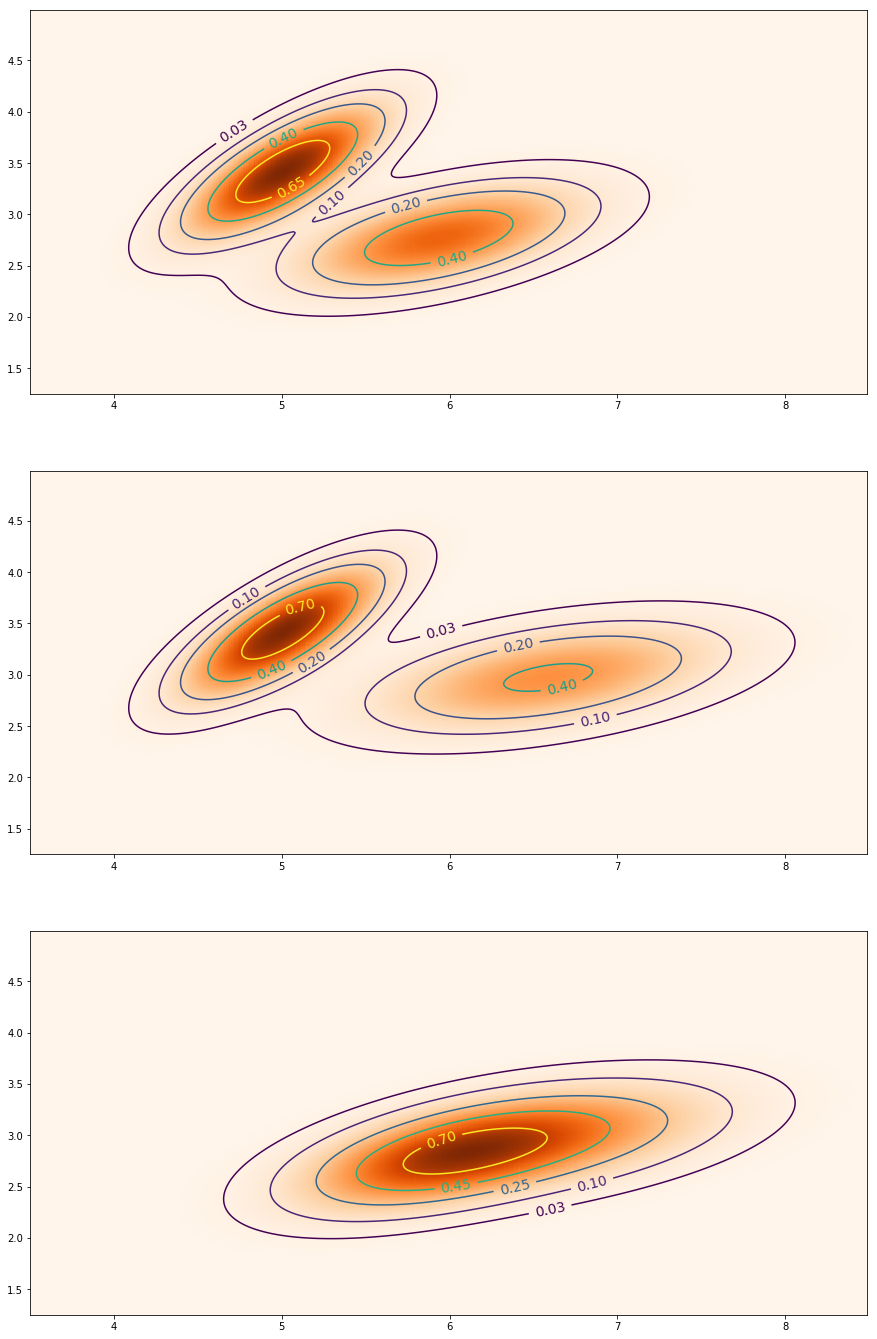

In [120]:
plt.figure(figsize=(15, 24))

contours = ([0.03, 0.1, 0.2, 0.4, 0.65],
            [0.03, 0.1, 0.2, 0.4, 0.7], 
            [0.03, 0.1, 0.25, 0.45, 0.7])
densities = [density12, density13, density23]
for i, info in enumerate(zip(densities, contours)):
    density = info[0]
    contour = info[1]
    plt.subplot(3, 1, i + 1)
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
    CS = plt.contour(grid[0], grid[1], density, contour)
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
    
plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [143]:
densv = np.empty(shape = (len(sample), 3))
for i in range(len(sample)):
    densv[i] = [sps.multivariate_normal.pdf(sample[i], mean = mean1, cov = cov1),
                sps.multivariate_normal.pdf(sample[i], mean = mean2, cov = cov2),
                sps.multivariate_normal.pdf(sample[i], mean = mean3, cov = cov3)]
    
predict = np.empty(shape = (len(sample)))
for i in range(len(predict)):
    predict[i] = np.argmax(densv[i])

print('Доля ошибок на выборке =', 1 - accuracy_score(predict, target))

Доля ошибок на выборке = 0.02


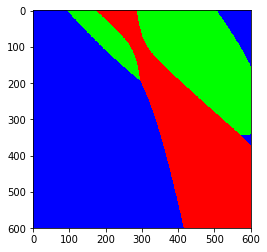

In [141]:
grid = np.mgrid[0:6:0.01, 0:6:0.01]

density1 = sps.multivariate_normal.pdf(grid.T, mean1[0:2], cov1[0:2, 0:2]) 
density2 = sps.multivariate_normal.pdf(grid.T, mean2[0:2], cov2[0:2, 0:2])  
density3 = sps.multivariate_normal.pdf(grid.T, mean3[0:2], cov3[0:2, 0:2])

img = np.zeros(shape = (len(density1), len(density1), 3), dtype = np.uint8)
for i in range(600):
    for j in range(600):
        m = np.argmax([density1[i][j], density2[i][j], density3[i][j]])
        img[i][j][m] = 255
plt.imshow(img)

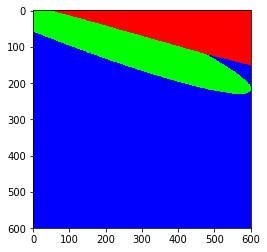

In [142]:
grid = np.mgrid[0:6:0.01, 0:6:0.01]

density1 = sps.multivariate_normal.pdf(grid.T, mean1[1:4:2], cov1[1:4:2, 1:4:2]) 
density2 = sps.multivariate_normal.pdf(grid.T, mean2[1:4:2], cov2[1:4:2, 1:4:2])  
density3 = sps.multivariate_normal.pdf(grid.T, mean3[1:4:2], cov3[1:4:2, 1:4:2])

img = np.zeros(shape = (len(density1), len(density1), 3), dtype = np.uint8)
for i in reversed(range(600)):
    for j in range(600):
        m = np.argmax([density1[i][j], density2[i][j], density3[i][j]])
        img[i][j][m] = 255
plt.imshow(img)

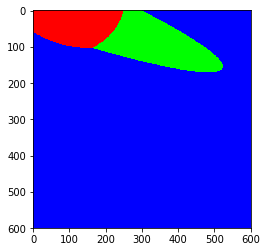

In [139]:
grid = np.mgrid[0:6:0.01, 0:6:0.01]

density1 = sps.multivariate_normal.pdf(grid.T, mean1[2:4], cov1[2:4, 2:4]) 
density2 = sps.multivariate_normal.pdf(grid.T, mean2[2:4], cov2[2:4, 2:4])  
density3 = sps.multivariate_normal.pdf(grid.T, mean3[2:4], cov3[2:4, 2:4])

img = np.zeros(shape = (len(density1), len(density1), 3), dtype = np.uint8)
for i in reversed(range(600)):
    for j in range(600):
        m = np.argmax([density1[i][j], density2[i][j], density3[i][j]])
        img[i][j][m] = 255
plt.imshow(img)

**Вывод:** классификация пространства по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$ дает довольно точный результат с малой долей ошибок.

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture